<a href="https://www.kaggle.com/code/abhayratti/mnist-model-w-numpy?scriptVersionId=110065818" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.shape

(42000, 785)

In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [5]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):
    return Z > 0
    
def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T) 
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T) 
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [7]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

Iteration:  0
[9 9 9 ... 9 1 9] [6 1 8 ... 1 6 2]
0.0945609756097561
Iteration:  10
[4 8 7 ... 1 1 1] [6 1 8 ... 1 6 2]
0.21309756097560975
Iteration:  20
[4 1 7 ... 1 1 1] [6 1 8 ... 1 6 2]
0.2666829268292683
Iteration:  30
[0 1 7 ... 1 1 1] [6 1 8 ... 1 6 2]
0.31665853658536586
Iteration:  40
[0 1 7 ... 1 1 1] [6 1 8 ... 1 6 2]
0.34941463414634144
Iteration:  50
[0 6 7 ... 1 1 1] [6 1 8 ... 1 6 2]
0.3843170731707317
Iteration:  60
[0 6 7 ... 1 1 2] [6 1 8 ... 1 6 2]
0.4192682926829268
Iteration:  70
[0 6 9 ... 1 1 2] [6 1 8 ... 1 6 2]
0.4493658536585366
Iteration:  80
[0 6 9 ... 1 1 2] [6 1 8 ... 1 6 2]
0.4739024390243902
Iteration:  90
[0 6 9 ... 1 1 2] [6 1 8 ... 1 6 2]
0.49758536585365853
Iteration:  100
[0 6 9 ... 1 1 2] [6 1 8 ... 1 6 2]
0.5202439024390244
Iteration:  110
[0 6 9 ... 1 1 2] [6 1 8 ... 1 6 2]
0.5431463414634147
Iteration:  120
[0 6 3 ... 1 1 2] [6 1 8 ... 1 6 2]
0.5645365853658536
Iteration:  130
[0 6 9 ... 1 2 2] [6 1 8 ... 1 6 2]
0.5856341463414634
Iteration:  1

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions 

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [6]
Label:  6


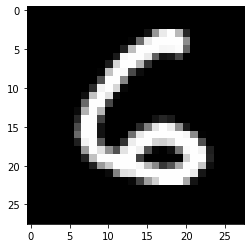

Prediction:  [1]
Label:  1


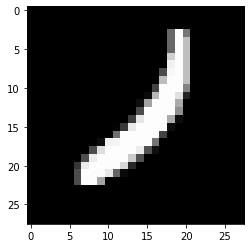

Prediction:  [8]
Label:  8


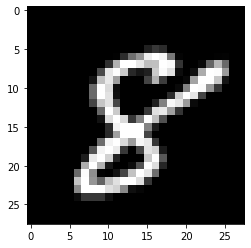

Prediction:  [1]
Label:  1


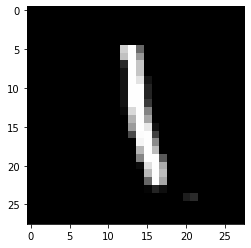

Prediction:  [7]
Label:  7


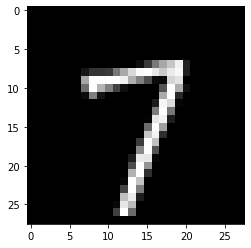

Prediction:  [9]
Label:  9


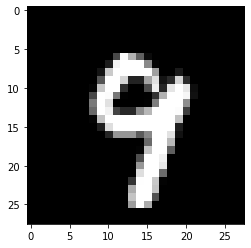

Prediction:  [2]
Label:  2


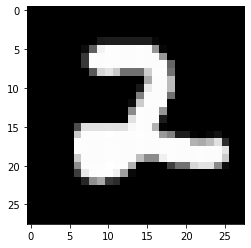

Prediction:  [1]
Label:  1


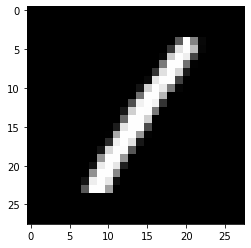

Prediction:  [2]
Label:  2


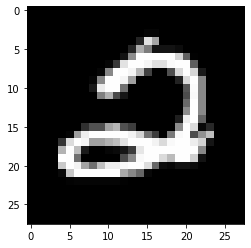

Prediction:  [5]
Label:  5


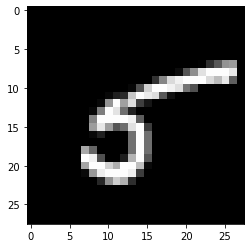

In [10]:
for i in range(10):
    test_prediction(i, W1, b1, W2,b2)